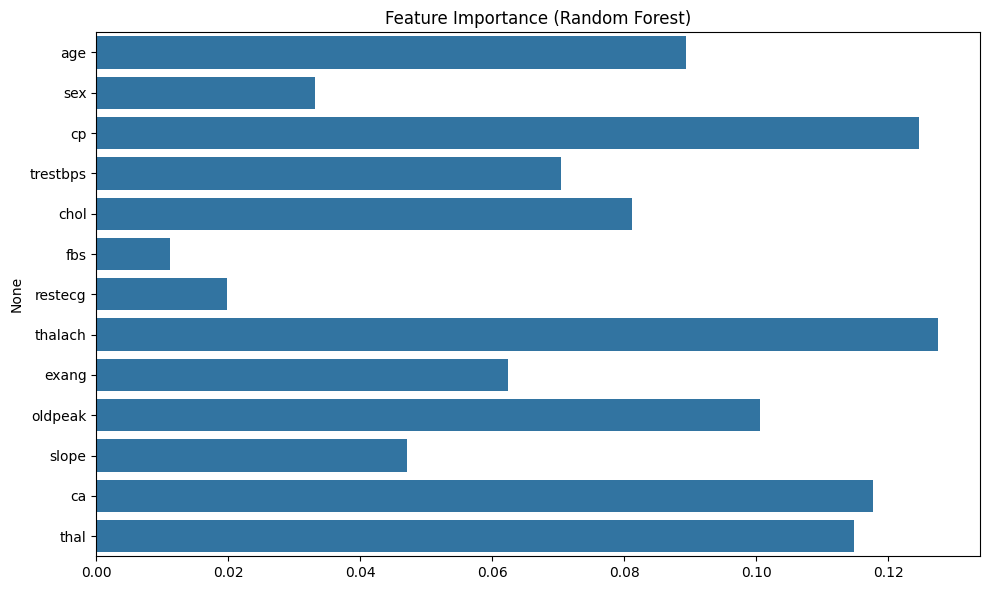

c:\Users\Eslam Ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected Features by RFE: Index(['sex', 'cp', 'exang', 'slope', 'ca'], dtype='object')
     Feature  Chi2 Score       p_value
12      thal   44.877965  2.097045e-11
8      exang   38.052613  6.886243e-10
11        ca   28.038394  1.189323e-07
9    oldpeak   11.382669  7.413251e-04
10     slope   10.984336  9.188519e-04
1        sex    7.432845  6.404399e-03
2         cp    7.384879  6.577449e-03
6    restecg    4.322448  3.761276e-02
7    thalach    2.670638  1.022151e-01
0        age    1.005896  3.158880e-01
3   trestbps    0.532647  4.654960e-01
5        fbs    0.164669  6.848935e-01
4       chol    0.111079  7.389193e-01


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("../data/heart_disease.csv")

X= df.drop("target", axis=1)
y= df["target"]

rf = RandomForestClassifier(random_state=42)
rf.fit(X,y)

importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances , y=features)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
# plt.savefig("../result/feature_importance_rf.png", dpi=150 , bbox_inches ="tight")
plt.show()

# RECURSIVE FEATURE ELIMINTATION
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)

# اختيار عدد ال features
rfe.fit(X,y)

selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:", selected_features)


#CHI-SQUARE TEST
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

chi2_scores , p_values = chi2(X_minmax,y)
chi2_result =pd.DataFrame({"Feature": X.columns, "Chi2 Score": chi2_scores, "p_value": p_values})

print(chi2_result.sort_values(by="Chi2 Score", ascending=False))

X_selected = X[selected_features]  # حسب اختيارك النهائي
df_selected = pd.concat([X_selected, y], axis=1)
df_selected.to_csv("../data/heart_disease_selected.csv", index=False)